### IMPORT PYSPARK PACKAGES

In [0]:
# Import pyspark packages
from pyspark.sql.types import *
from pyspark.sql.functions import *

### CREATE DATAFRAME 

In [0]:
#Using Create Dataframe method
Schema = StructType([
           StructField("Id", StringType()),
           StructField("Study Title", StringType()),
           StructField("Acronym", StringType()),
           StructField("Status", StringType()),
           StructField("Conditions", StringType()),
           StructField("Interventions", StringType()),
           StructField("Sponsor", StringType()),
           StructField("Collaborators", StringType()),
           StructField("Enrollment", StringType()),
           StructField("Funder Type", StringType()),
           StructField("Type", StringType()),
           StructField("Study Design", StringType()),
           StructField("Start", StringType()),
           StructField("Completion", StringType())
           ])

clinicaltrial_2023 = sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")

clinicaltrial_2023 = clinicaltrial_2023.map(lambda line: line.replace('"','').replace(',,','').split("\t"))

header = clinicaltrial_2023.first()

clinicaltrial_2023 = clinicaltrial_2023.map(lambda row: row + ["NULL" for i in range(len(header) - len(row))] if len(row) < len(header) else row)

clinicaltrial_2023 = clinicaltrial_2023.map(lambda row: [col if col != "" else "NULL" for col in row])

clinicaltrial_2023 = clinicaltrial_2023.filter(lambda x: x != header)

clinicaltrial_2023DF = spark.createDataFrame(clinicaltrial_2023, Schema)

clinicaltrial_2023DF.display(10, truncate= False)

Id Study Title Acronym Status Conditions Interventions Sponsor Collaborators Enrollment Funder Type Type Study Design Start Completion NCT03630471 Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India PRIDE COMPLETED Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse) BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care Sangath Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine 250.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2018-08-20 2019-02-28, NCT05992571 Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity NULL RECRUITING Cerebrovascular Function|Cognition OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB McMaster University Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton 30.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE 2023-10-25 2024-08 NCT00237471 Impact of Tight Glycaemic Control in Acute Myocardial Infarction NULL TERMINATED Myocardial Infarct|Hyperglycemia DRUG: Insulin (tight blood glucose control) Melbourne Health National Health and Medical Research Council, Australia|Bristol-Myers Squibb 40.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT 2005-10 2006-05, NCT03820271 New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation SUPERMELD RECRUITING Decompensated Cirrhosis|Liver Transplantation OTHER: SuperMELD Assistance Publique - Hôpitaux de Paris NULL 500.0 OTHER INTERVENTIONAL Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: OTHER 2020-10-01 2023-10-01 NCT06229171 InTake Care: Development and Validation of an Innovative, Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention InTakeCare NOT_YET_RECRUITING Hypertension|Treatment Adherence and Compliance|Digital Health OTHER: adherence support system based on a vocal assistant Istituto Auxologico Italiano Istituti Clinici Scientifici Maugeri SpA|Politecnico di Milano 206.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: OTHER 2024-10-01 2026-04-01, NCT02945371 Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life REV COMPLETED Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training University of Oregon NULL 103.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION 2014-09 2016-05 NCT01055171 Neuromodulation of Trauma Memories in PTSD & Alcohol Dependence NULL COMPLETED Alcohol Dependence|PTSD DRUG: Propranolol|DRUG: Placebo Medical University of South Carolina National Institute on Alcohol Abuse and Alcoholism (NIAAA) 44.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2010-01 2012-08, NCT01125371 Computerized Brief Alcohol Intervention (BI) for Binge Drinking HIV At-Risk and Infected Women NULL COMPLETED Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection BEHAVIORAL: Computerized brief alcohol intervention + IVR booster calls|BEHAVIORAL: Computerized brief alcohol intervention|BEHAVIORAL: Attention Control Johns Hopkins University National Institute on Alcohol Abuse and Alcoholism (NIAAA) 439.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Pri

### DISTINCT COUNT OF STUDIES

In [0]:
# Distinct count of studies
clinicaltrial_2023DF.select('Id').distinct().count()

483422

### TYPE OF STUDIES AND THEIR FREQUENCIES

In [0]:
# Grouping by Type column and counting in descending order.
clinicaltrial_2023DF.where(~clinicaltrial_2023DF.Type.like('NULL')).groupBy('Type').count().orderBy('count', ascending = False).show(truncate = False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
+---------------+------+



### TOP 5 CONDITIONS AND THEIR FREQUENCIES

In [0]:
# Cleaning the Dataframe, spliting the conditions column into another column, 
# converting split values to new records, removal of empty values, dropping temporary split column.
ConditionsDF = clinicaltrial_2023DF.withColumn('ConditionsNew', split(col('Conditions'), r'\|'))\
                                   .withColumn("Conditions", explode(col("ConditionsNew")))\
                                       .where(length(col("Conditions"))> 0)\
                                           .drop("ConditionsNew")


ConditionsDF.groupBy('Conditions').count().orderBy('count', ascending = False).show(5, truncate = False)

+-------------+-----+
|Conditions   |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4072 |
|Hypertension |4020 |
+-------------+-----+
only showing top 5 rows



###TOP 10 MOST COMMON SPONSORS THAT ARE NOT PHARMACEUTICAL COMPANIES

In [0]:
#Creating PharmaDF
pharmaDF = spark.read.csv("/FileStore/tables/pharma.csv", header = "True")

clinicaltrial_2023DF.join(pharmaDF, clinicaltrial_2023DF.Sponsor == pharmaDF.Parent_Company, 'left_anti').groupBy('Sponsor').count().orderBy('count', ascending=False).show(10, truncate=False)

+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-------------------------------------------------------------+-----+
only showing top 10 

###NUMBER OF STUDIES PER MONTH IN 2023

In [0]:
# Number of studies per month in 2023 
clinicaltrial_2023DF_ = clinicaltrial_2023DF.withColumn('Month', substring(split(col('Completion'), '-')[1], 1, 2 ))\
                                             .withColumn('Year', split(col('Completion'), '-')[0])

clinicaltrial_2023DF_.where(clinicaltrial_2023DF_.Year == '2023').where(clinicaltrial_2023DF_.Status == 'COMPLETED').groupBy('Month').count().orderBy('Month').show(truncate = False)

+-----+-----+
|Month|count|
+-----+-----+
|01   |1494 |
|02   |1272 |
|03   |1552 |
|04   |1324 |
|05   |1415 |
|06   |1619 |
|07   |1360 |
|08   |1230 |
|09   |1152 |
|10   |1058 |
|11   |909  |
|12   |1082 |
+-----+-----+



### MAXIMUM PENALTY AMOUNT PAID PER PHARMACEUTICAL COMPANY

In [0]:
# Import necessary functions 
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

In [0]:
# Define function clean penalty amount to remove ($ & ',') and convert it to a float

def clean_penalty_amount(penalty_amount):
    cleaned = F.trim(F.regexp_replace(penalty_amount, r'[$,]', ''))
    return F.when(cleaned == '', None).otherwise(cleaned.cast(IntegerType()))

pharmaDFNew = pharmaDF.withColumn('Clean_Penalty_Amount', clean_penalty_amount('Penalty_Amount'))

PenaltiesByParentCompany = pharmaDFNew.groupBy("Parent_Company") \
                                      .agg(F.max("Clean_Penalty_Amount").alias("Max_Penalty_Amount")) \
                                      .orderBy("Max_Penalty_Amount", ascending=False)

PenaltiesByParentCompany.show(10, truncate=False)



+------------------------------+------------------+
|Parent_Company                |Max_Penalty_Amount|
+------------------------------+------------------+
|Mallinckrodt                  |1600000000        |
|AbbVie                        |1500000000        |
|Eli Lilly                     |1415000000        |
|Teva Pharmaceutical Industries|1200000000        |
|Merck                         |950000000         |
|Takeda Pharmaceutical         |875000000         |
|Pfizer                        |784600000         |
|Amgen                         |762000000         |
|GlaxoSmithKline               |750000000         |
|Merck KGaA (EMD)              |704000000         |
+------------------------------+------------------+
only showing top 10 rows



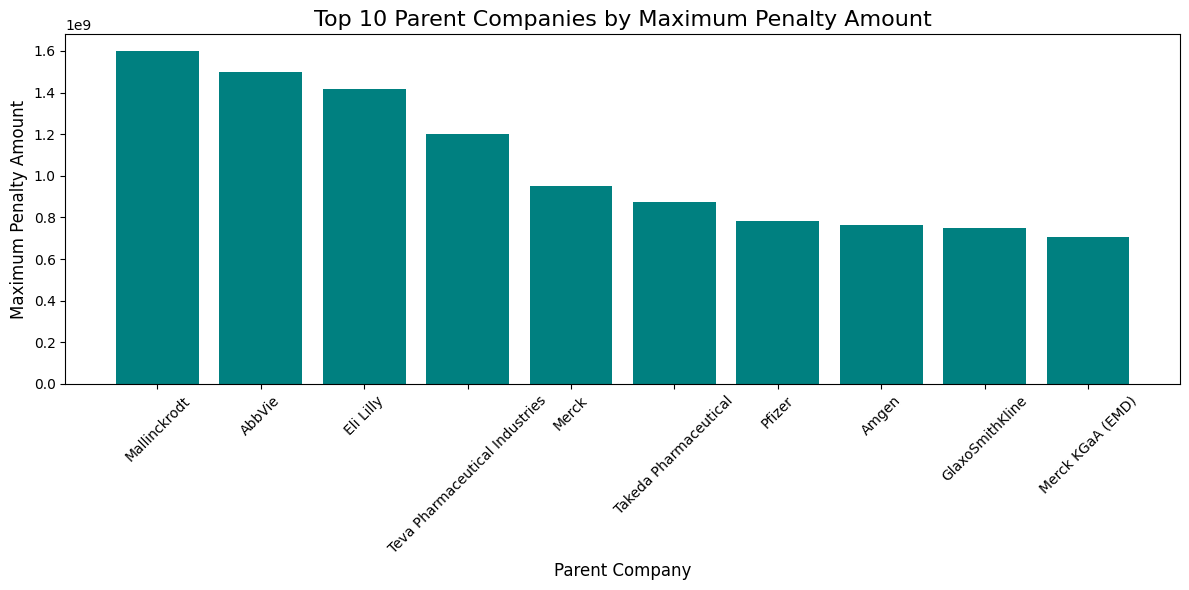

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
penaltiesByParentCompanyPandas = PenaltiesByParentCompany.toPandas()

# Sort the data by 'Max_Penalty_Amount' in descending order and select the top 10 rows
top10 = penaltiesByParentCompanyPandas.sort_values(by='Max_Penalty_Amount', ascending=False).head(10)

# Create a bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for the top 10 parent companies with red bars
ax.bar(top10['Parent_Company'], top10['Max_Penalty_Amount'], color='teal')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Parent Company', fontsize=12)
plt.ylabel('Maximum Penalty Amount', fontsize=12)
plt.title('Top 10 Parent Companies by Maximum Penalty Amount', fontsize=16)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()